# F1 Championship(1950-2023) Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
result_df = pd.read_csv('results.csv')
stats_df = pd.read_csv('status.csv')
drivers_df = pd.read_csv('drivers.csv')
races_df = pd.read_csv('races.csv')
constructor_df = pd.read_csv('constructors.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
pd.get_option("display.max_columns",None)

In [3]:
result_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
stats_df.head() 

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [5]:
drivers_df.head() 

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [6]:
races_df.head() 

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
constructor_df.head() 

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
races_df['raceId']

0          1
1          2
2          3
3          4
4          5
        ... 
1096    1116
1097    1117
1098    1118
1099    1119
1100    1120
Name: raceId, Length: 1101, dtype: int64

In [9]:
races_df = races_df.raceId.astype(int)

In [10]:
# merging all seperate dataframe into single dataframe as df

con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [11]:
# checking of null values

df.isna().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time                 0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
url_x                0
driverStandingsId    0
raceId_y             0
points_y             0
position_y           0
positionText_y       0
wins                 0
constructorRef       0
name                 0
nationality_y        0
url_y                0
status               0
dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537627 entries, 0 to 3537626
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time               object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  driverRef          object 
 19  number_y           object 
 20  code               object 
 21  forename           object 
 22  surname            object 
 23  dob                object 
 24  nationality_x      object 
 25  url_x             

In [13]:
# summary
df.describe().T


,count,mean,std,min,25%,50%,75%,max
resultId,3537627.0,12630.091396,8209.508032,1.0,5125.0,11763.0,21140.0,26085.0
raceId_x,3537627.0,517.066570,331.536193,1.0,234.0,467.0,856.0,1110.0
driverId,3537627.0,204.182795,265.852299,1.0,20.0,105.0,229.0,858.0
constructorId,3537627.0,39.412151,56.860468,1.0,6.0,16.0,37.0,214.0
grid,3537627.0,9.763203,6.557031,0.0,4.0,9.0,15.0,34.0
positionOrder,3537627.0,11.229562,7.378775,1.0,5.0,10.0,17.0,39.0
points_x,3537627.0,2.998598,5.334331,0.0,0.0,0.0,4.0,50.0
laps,3537627.0,48.362040,25.123229,0.0,32.0,55.0,67.0,200.0
statusId,3537627.0,13.238133,22.544512,1.0,1.0,5.0,12.0,141.0
driverStandingsId,3537627.0,40117.463301,25309.272186,1.0,13856.0,49960.0,65824.0,72187.0


In [14]:
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [15]:
# droping unwanted columns 

columns_to_drop = ['url_y', 'url_x', 'position_x', 'fastestLapTime', 'positionText_x', 'time', 'driverRef',
                   'constructorRef', 'nationality_y', 'positionText_y', 'raceId_y', 'points_y']

df = df.drop(columns_to_drop, axis=1)

In [16]:
# changing of old column name to meaningful name

col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,name,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [17]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,name,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [18]:
# Adding two column (forename,surname) to create a single column called driver_name

df['driver_name'] = df['forename']+' '+df['surname']

In [19]:
df = df.drop(['forename', 'surname'], axis=1)


In [20]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton


In [21]:
# converting to date format from string 

pd.to_datetime(df.dob)

0         1985-01-07
1         1985-01-07
2         1985-01-07
3         1985-01-07
4         1985-01-07
             ...    
3537622   1913-05-05
3537623   1913-05-05
3537624   1913-05-05
3537625   1913-05-05
3537626   1913-05-05
Name: dob, Length: 3537627, dtype: datetime64[ns]

In [22]:
df['dob'] = pd.to_datetime(df['dob'])

In [23]:
from datetime import datetime

# calculating driver's age and creating it as a new column

dates = datetime.today()-df['dob']
age = dates.dt.days/365

df['age'] = round(age)

pd.set_option('display.max_columns', None)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [24]:
# changing datatype

l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [25]:
# null values after changing datatype
df.isnull().sum() / len(df) * 100

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.004523
grid                      0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
timetaken_in_millisec    61.421936
fastestLap               60.511100
rank                     59.513764
max_speed                60.511100
statusId                  0.000000
driver_num               66.578557
driver_code               0.000000
dob                       0.000000
nationality               0.000000
driverStandingsId         0.000000
position                  0.000000
wins                      0.000000
name                      0.000000
status                    0.000000
driver_name               0.000000
age                       0.000000
dtype: float64

In [26]:
df['max_speed'].mean()

204.02159408791888

In [27]:
#filling null values with mean

df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [28]:
df.isnull().sum() / len(df) * 100

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.000000
grid                      0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
timetaken_in_millisec     0.000000
fastestLap                0.000000
rank                      0.000000
max_speed                 0.000000
statusId                  0.000000
driver_num               66.578557
driver_code               0.000000
dob                       0.000000
nationality               0.000000
driverStandingsId         0.000000
position                  0.000000
wins                      0.000000
name                      0.000000
status                    0.000000
driver_name               0.000000
age                       0.000000
dtype: float64

In [29]:
df.drop('driver_num', axis = 1,inplace=True)

In [30]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537627 entries, 0 to 3537626
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   resultId               int64         
 1   racerId                int64         
 2   driverId               int64         
 3   constructorId          int64         
 4   number                 float64       
 5   grid                   int64         
 6   positionOrder          int64         
 7   points                 float64       
 8   laps                   int64         
 9   timetaken_in_millisec  float64       
 10  fastestLap             float64       
 11  rank                   float64       
 12  max_speed              float64       
 13  statusId               int64         
 14  driver_code            object        
 15  dob                    datetime64[ns]
 16  nationality            object        
 17  driverStandingsId      int64         
 18  position              

# data filtration

In [32]:
df_fin = df[df['status'] == 'Finished']
df_fin.tail()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
1363657,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72083,9,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363658,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72123,9,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363659,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72143,10,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363660,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72163,10,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363661,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72184,10,0,Manor Marussia,Finished,Esteban Ocon,27.0


In [33]:
mean = df.max_speed.mean()
mean2 = df.fastestLap.mean()
df = df_fin[df_fin['max_speed']>mean]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [34]:
df[df['fastestLap']>mean2]

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363488,26042,1108,856,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,1,DEV,1995-02-06,Dutch,72079,19,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363489,26042,1108,856,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,1,DEV,1995-02-06,Dutch,72119,20,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363490,26042,1108,856,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,1,DEV,1995-02-06,Dutch,72139,20,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363491,26042,1108,856,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,1,DEV,1995-02-06,Dutch,72159,20,0,AlphaTauri,Finished,Nyck de Vries,29.0


In [35]:
# filtering the data by mean of driver's age

df = df[df['age']<df['age'].mean()]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [36]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [37]:
df[cat].head()

,driver_code,nationality,name,status,driver_name
0,HAM,British,McLaren,Finished,Lewis Hamilton
1,HAM,British,McLaren,Finished,Lewis Hamilton
2,HAM,British,McLaren,Finished,Lewis Hamilton
3,HAM,British,McLaren,Finished,Lewis Hamilton
4,HAM,British,McLaren,Finished,Lewis Hamilton


In [38]:
df[num].head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,dob,driverStandingsId,position,wins,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,1,1,1,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,9,1,1,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,27,3,1,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,48,2,1,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,69,3,1,39.0


In [39]:
df.dtypes

resultId                          int64
racerId                           int64
driverId                          int64
constructorId                     int64
number                          float64
grid                              int64
positionOrder                     int64
points                          float64
laps                              int64
timetaken_in_millisec           float64
fastestLap                      float64
rank                            float64
max_speed                       float64
statusId                          int64
driver_code                      object
dob                      datetime64[ns]
nationality                      object
driverStandingsId                 int64
position                          int64
wins                              int64
name                             object
status                           object
driver_name                      object
age                             float64
dtype: object

# Outlier Removal 

In [40]:
# Specify the columns that should be used for outlier removal (e.g., 'column1', 'column2', ...)
#numeric_columns = df.[num]

# Calculate Q1 and Q3 for the specified columns
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)

# Calculate the IQR for the specified columns
IQR = Q3 - Q1

# Apply the outlier removal to the specified columns
df = df[~((df[num] < (Q1 - 1.5 * IQR)) | (df[num] > (Q3 + 1.5 * IQR))).any(axis=1)]

# df.head() to display the first few rows of the cleaned DataFrame
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [41]:
num.remove('statusId')

# EDA FROM HERE

## Univariate Analysis 

<Axes: xlabel='nationality'>

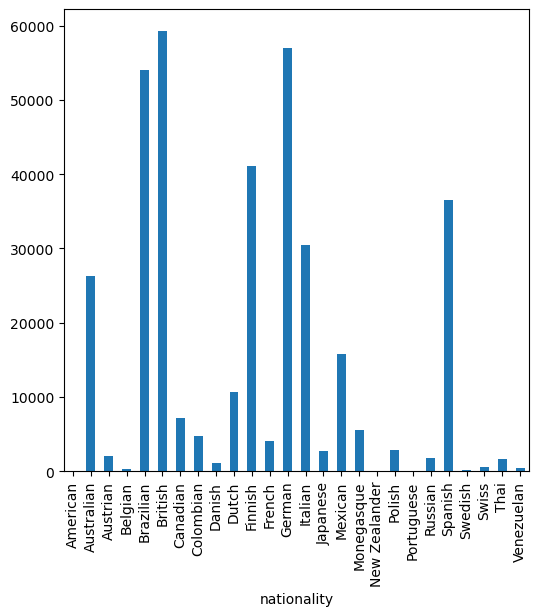

In [44]:
import seaborn as sns 
import matplotlib as plt

df.groupby('nationality').size().plot(kind = 'bar', 
                                 figsize = (6,6))

<Axes: xlabel='wins'>

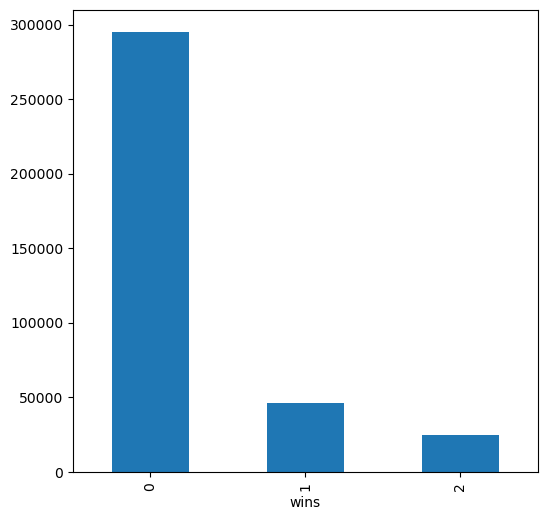

In [45]:
df.groupby('wins').size().plot(kind = 'bar', 
                                 figsize = (6,6))

<Axes: xlabel='name'>

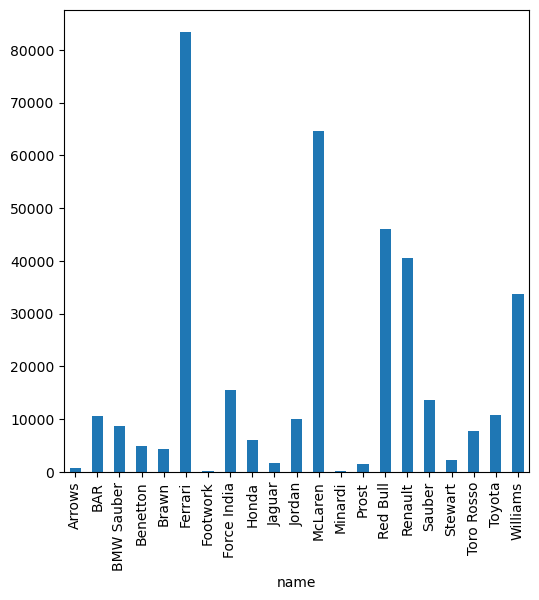

In [46]:
df.groupby('name').size().plot(kind = 'bar', 
                                 figsize = (6,6))

<Axes: xlabel='age'>

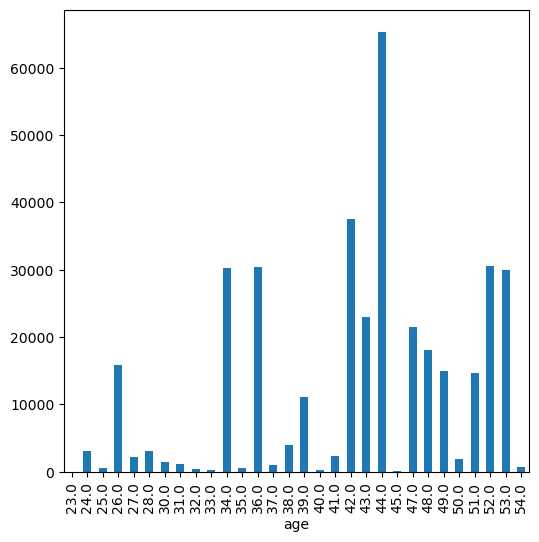

In [47]:
df.groupby('age').size().plot(kind = 'bar', figsize = (6,6))

In [48]:
df['age'].mean()

42.95276145325847

<Axes: xlabel='driver_name'>

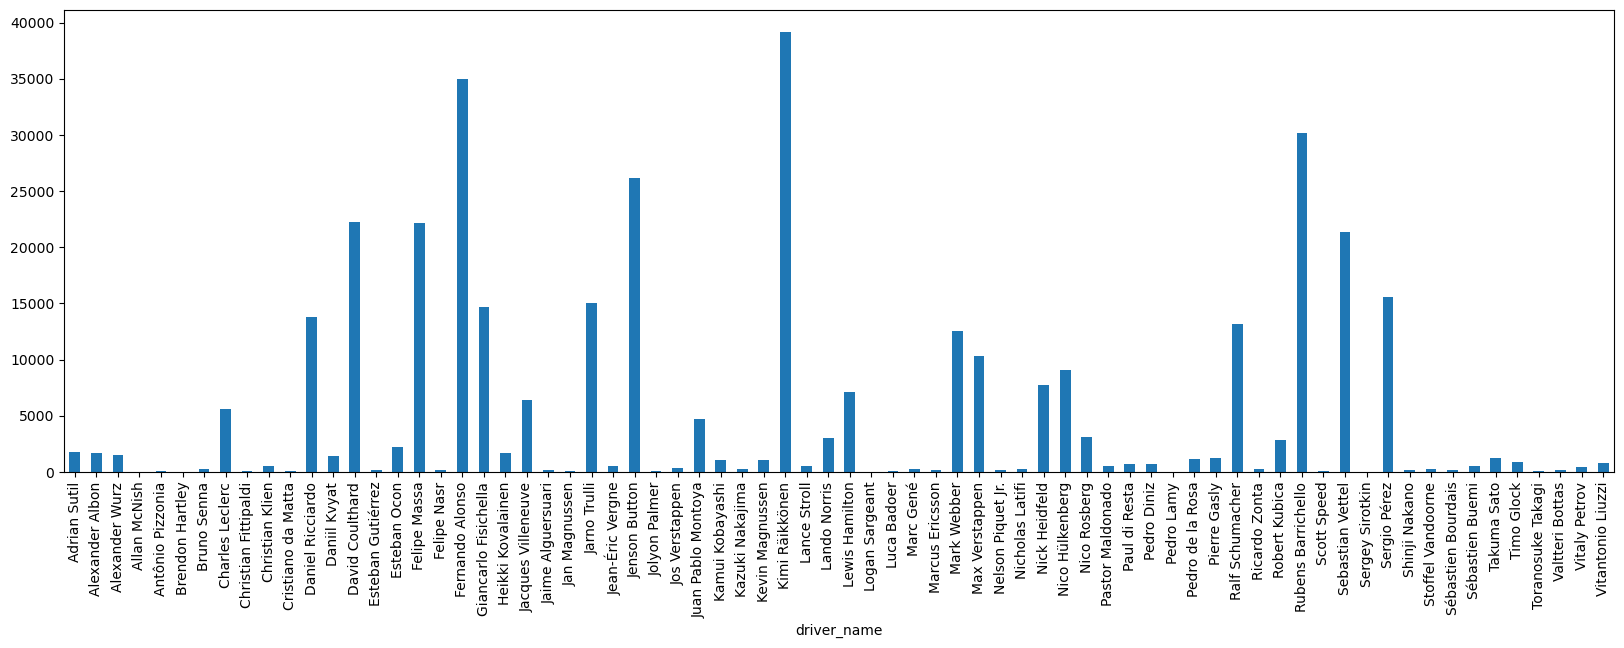

In [49]:
df.groupby('driver_name').size().plot(kind = 'bar', figsize = (20,6))

<Axes: xlabel='position'>

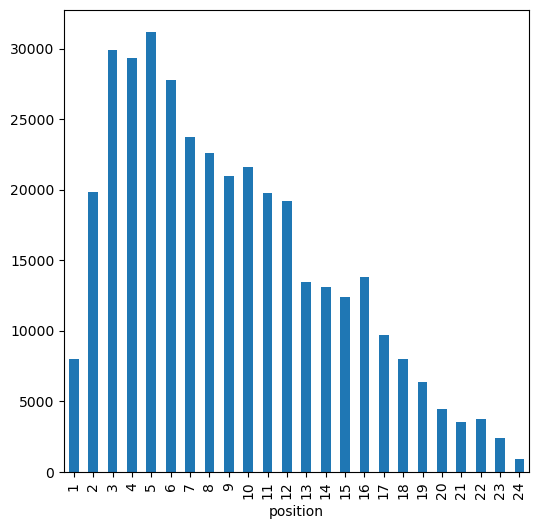

In [55]:
df.groupby('position').size().plot(kind = 'bar', figsize = (6,6))

<Axes: xlabel='fastestLap'>

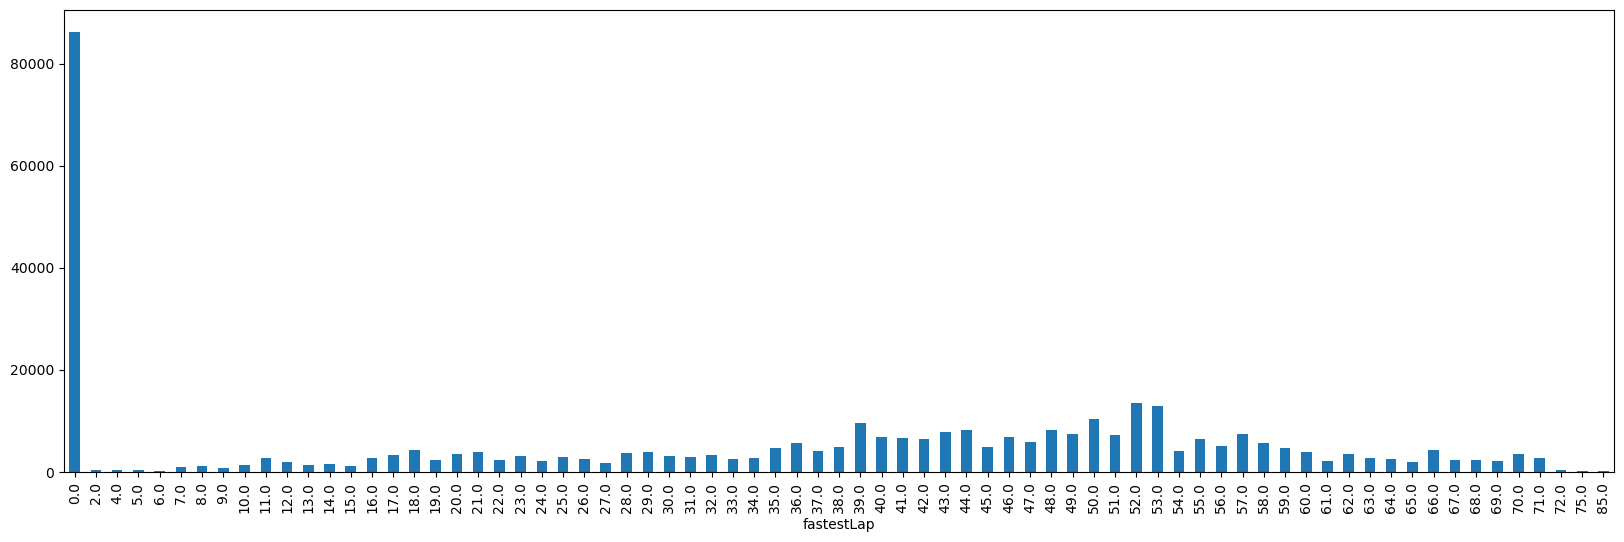

In [61]:
df.groupby('fastestLap').size().plot(kind = 'bar', figsize = (20,6))

<Axes: xlabel='constructorId'>

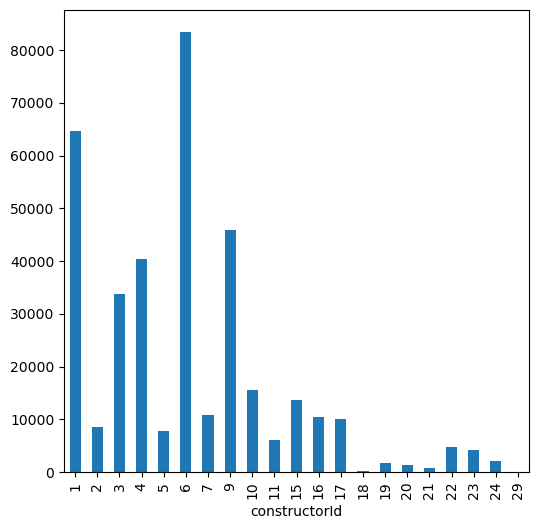

In [63]:
df.groupby('constructorId').size().plot(kind = 'bar', figsize = (6,6))

<Axes: xlabel='positionOrder'>

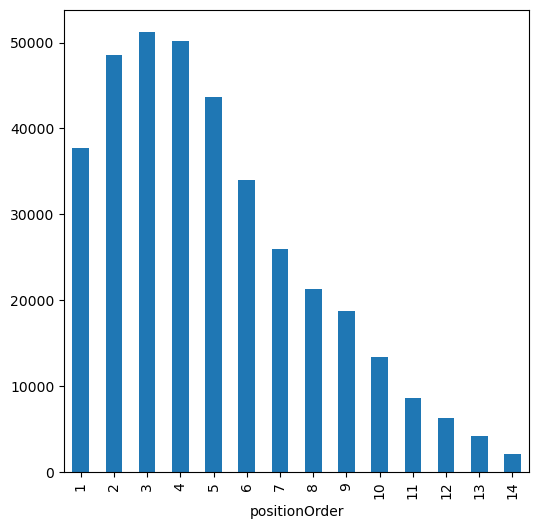

In [64]:
df.groupby('positionOrder').size().plot(kind = 'bar', figsize = (6,6))

<Axes: >

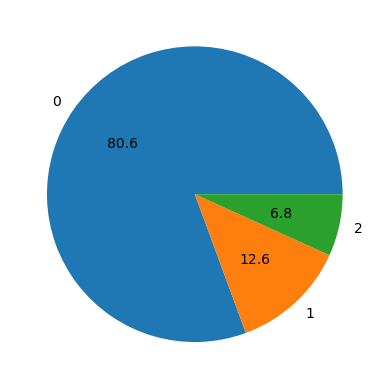

In [50]:
df.groupby('wins').size().plot(kind = 'pie', autopct = '%0.1f')


# Bivariate Analysis(Combining 2 or more columns and taking specific elements from columns)

<Axes: xlabel='name', ylabel='count'>

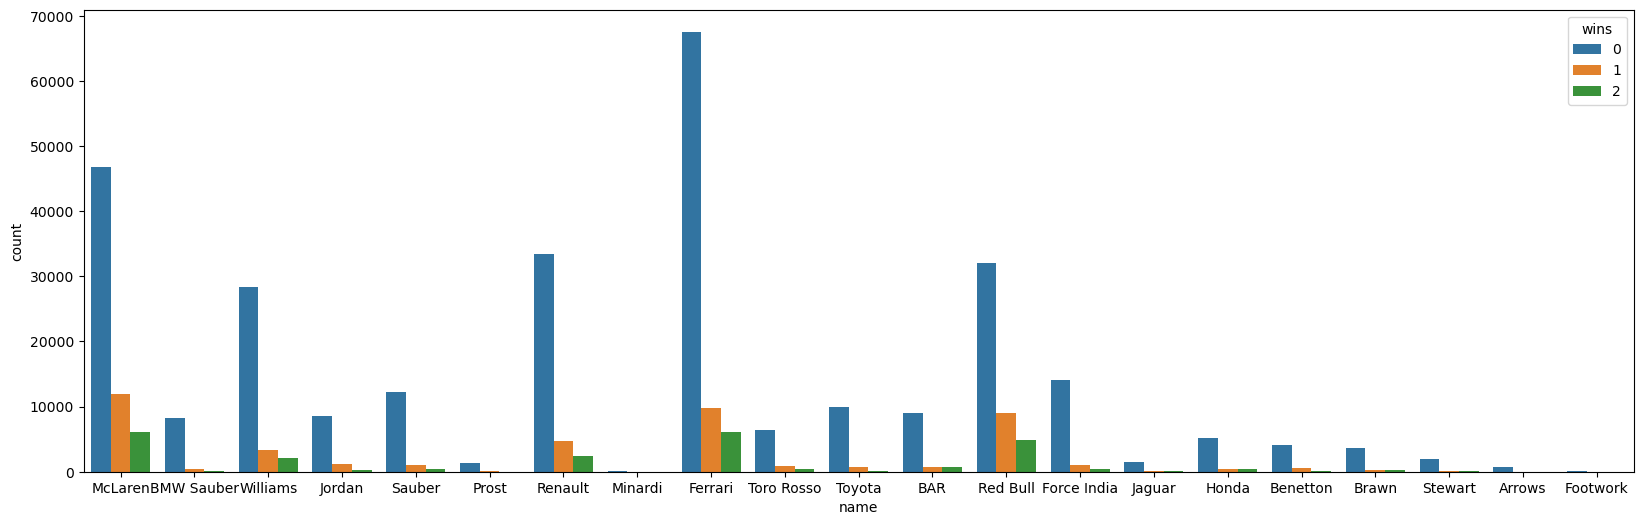

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

sns.countplot(x = df['name'], hue = df['wins'])


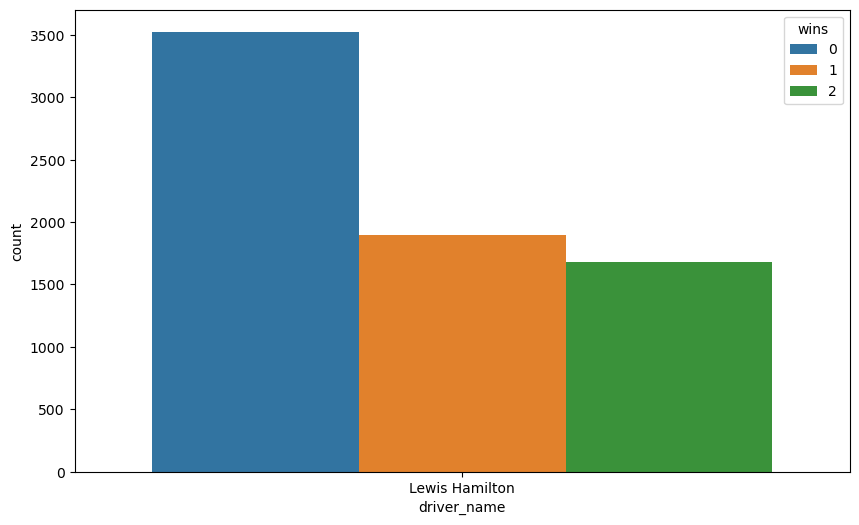

In [52]:
# Filter the DataFrame for rows where driver_name is 'Lewis Hamilton'
lewis_df = df[df['driver_name'] == 'Lewis Hamilton']

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the countplot using the filtered DataFrame
sns.countplot(x=lewis_df['driver_name'], hue=lewis_df['wins'])

# Show the plot
plt.show()

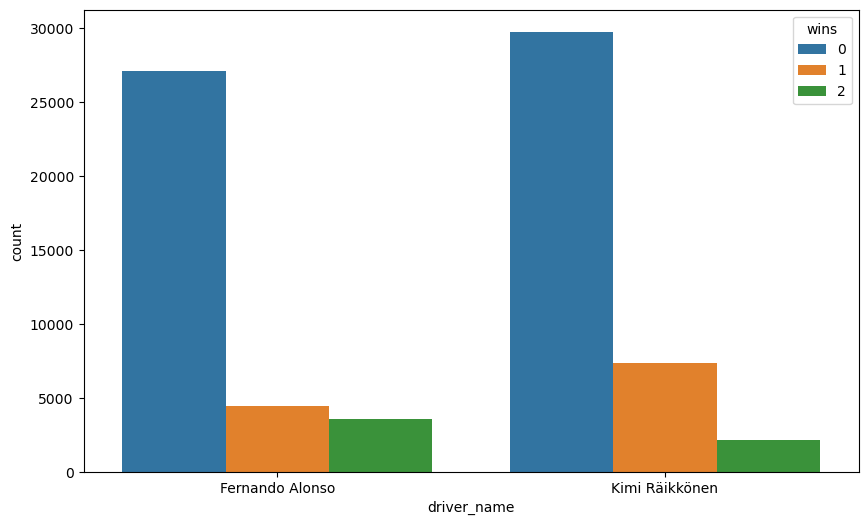

In [53]:

# Filter the DataFrame for rows where driver_name is 'Lewis Hamilton' or 'Kimi Räikkönen'
selected_drivers_df = df[df['driver_name'].isin(['Fernando Alonso', 'Kimi Räikkönen'])]

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the countplot using the filtered DataFrame
sns.countplot(x=selected_drivers_df['driver_name'], hue=selected_drivers_df['wins'])

# Show the plot
plt.show()

<Axes: xlabel='nationality', ylabel='count'>

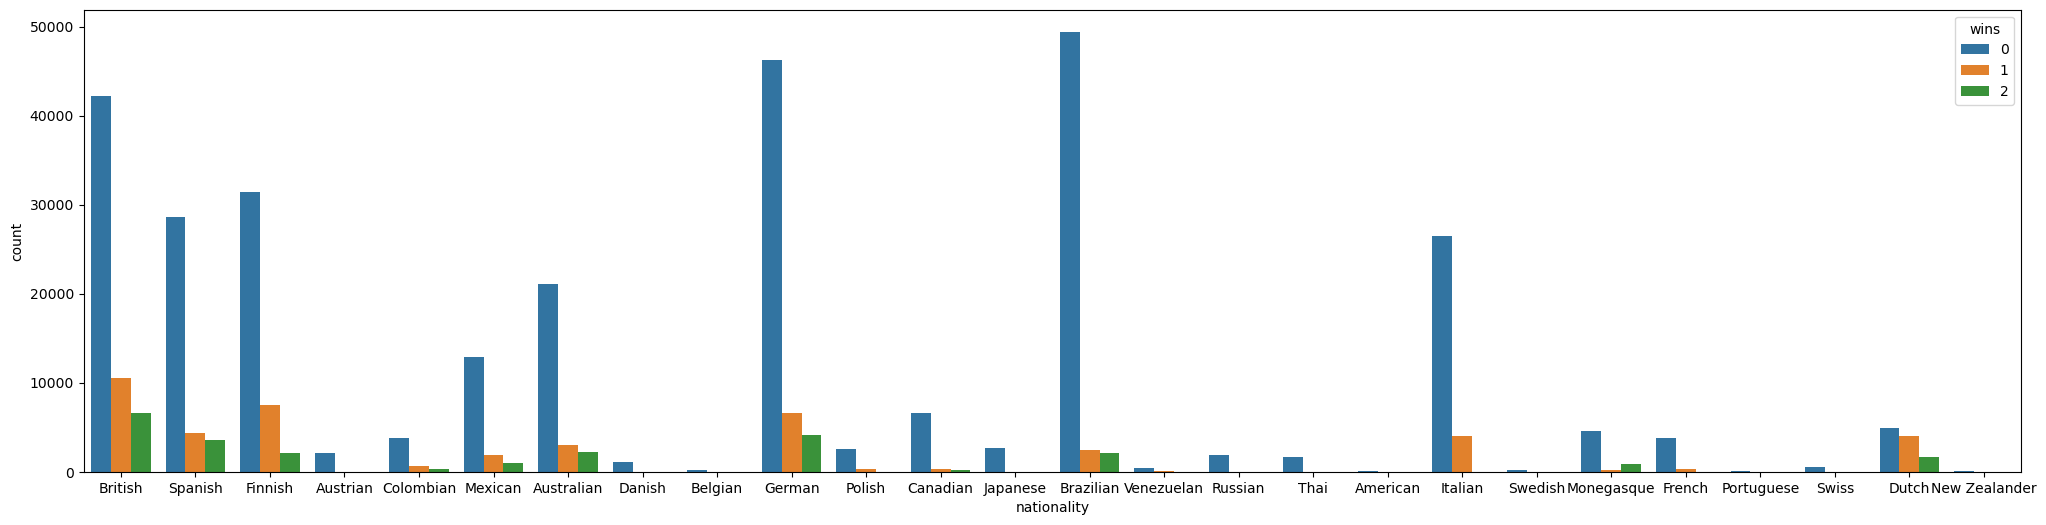

In [54]:
plt.figure(figsize=(25, 6))

sns.countplot(x = df['nationality'], hue = df['wins'])

In [56]:
df['position'].mean()#.plot(kind = 'bar', figsize = (6,6))

9.007072946933782

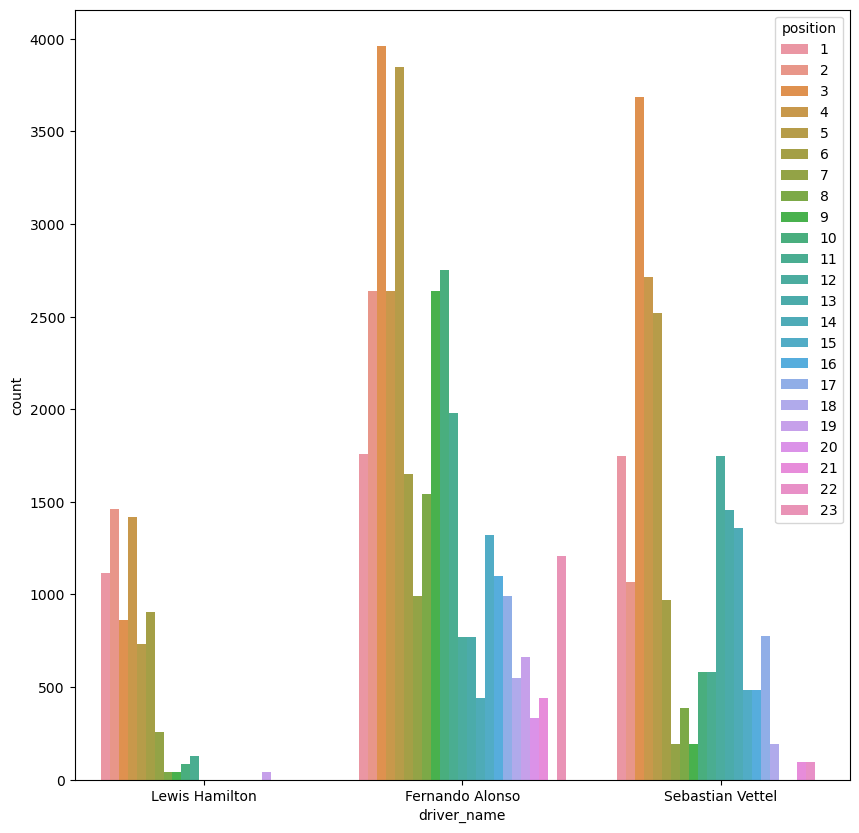

In [57]:
# Filter the DataFrame for rows where driver_name is 'Lewis Hamilton' or 'Kimi Räikkönen'
selected_drivers_df = df[df['driver_name'].isin(['Fernando Alonso', 'Lewis Hamilton', 'Sebastian Vettel'])]

# Set the size of the figure
plt.figure(figsize=(10, 10))

# Create the countplot using the filtered DataFrame
sns.countplot(x=selected_drivers_df['driver_name'], hue=selected_drivers_df['position'])

# Show the plot
plt.show()

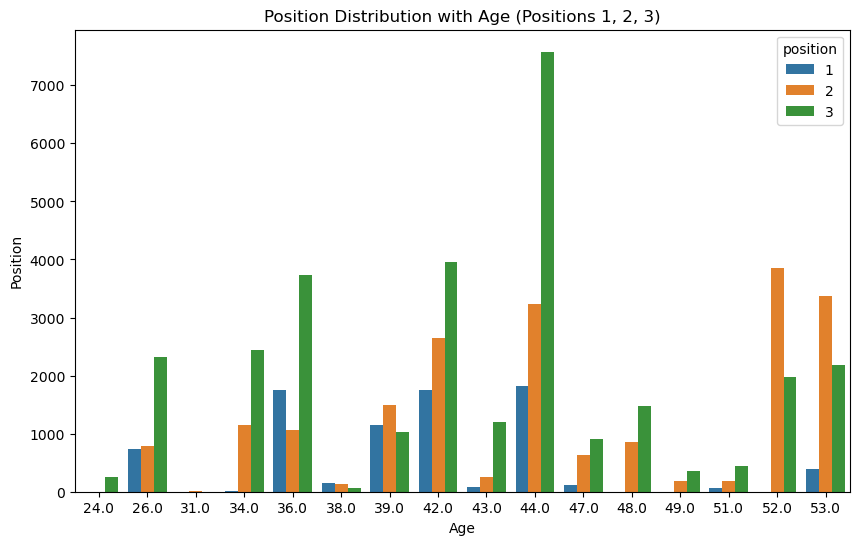

In [58]:
# Filter the DataFrame for positions 1, 2, and 3
filtered_df = df[df['position'].isin([1, 2, 3])]

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.countplot(x='age', hue='position', data=filtered_df)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Position')
plt.title('Position Distribution with Age (Positions 1, 2, 3)')

# Show the plot
plt.show()

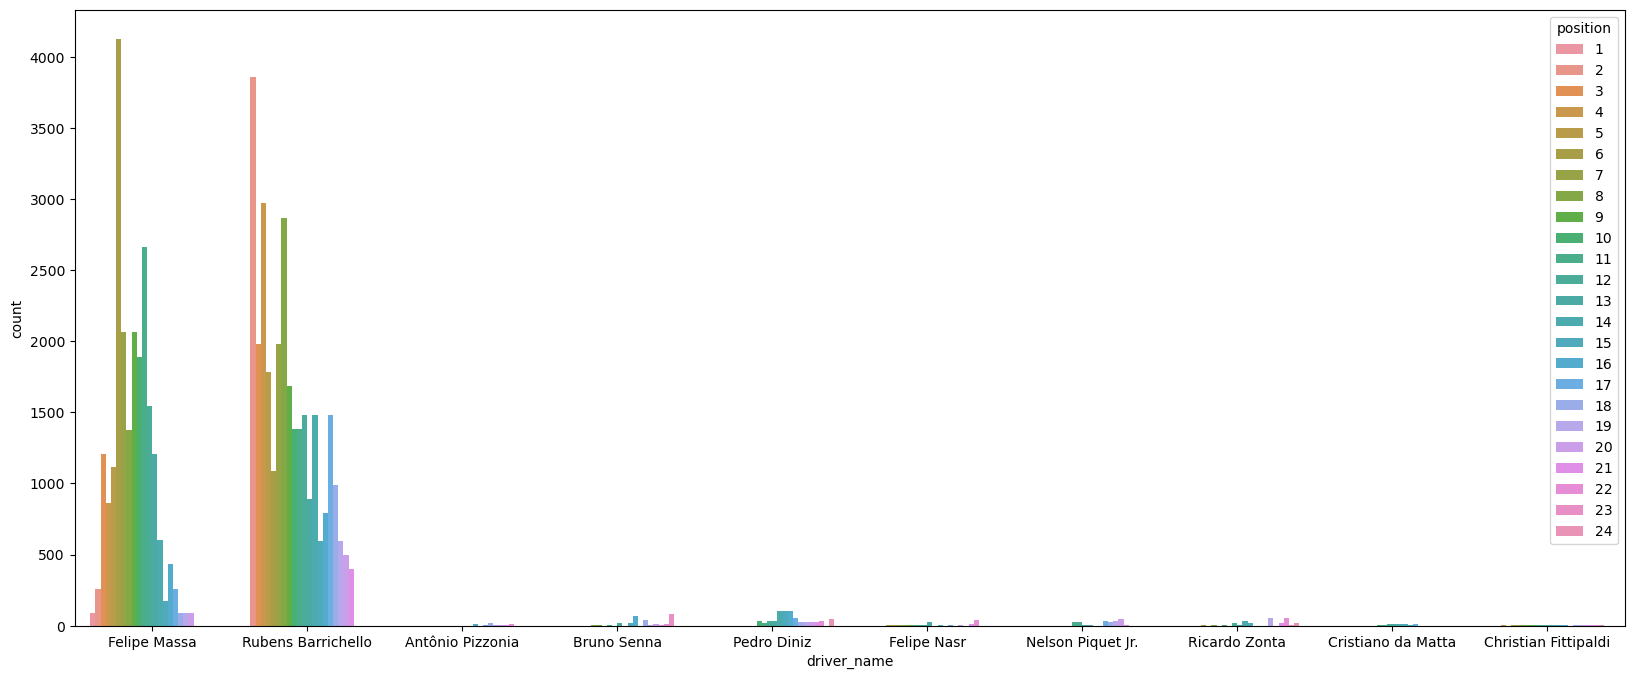

In [60]:
# Filter the data to keep Brazilian drivers
brazilian_drivers = df[df['nationality'] == 'Brazilian']

plt.figure(figsize=(20, 8))

# Plot the data
sns.countplot(x='driver_name', hue='position', data=brazilian_drivers)

plt.show()

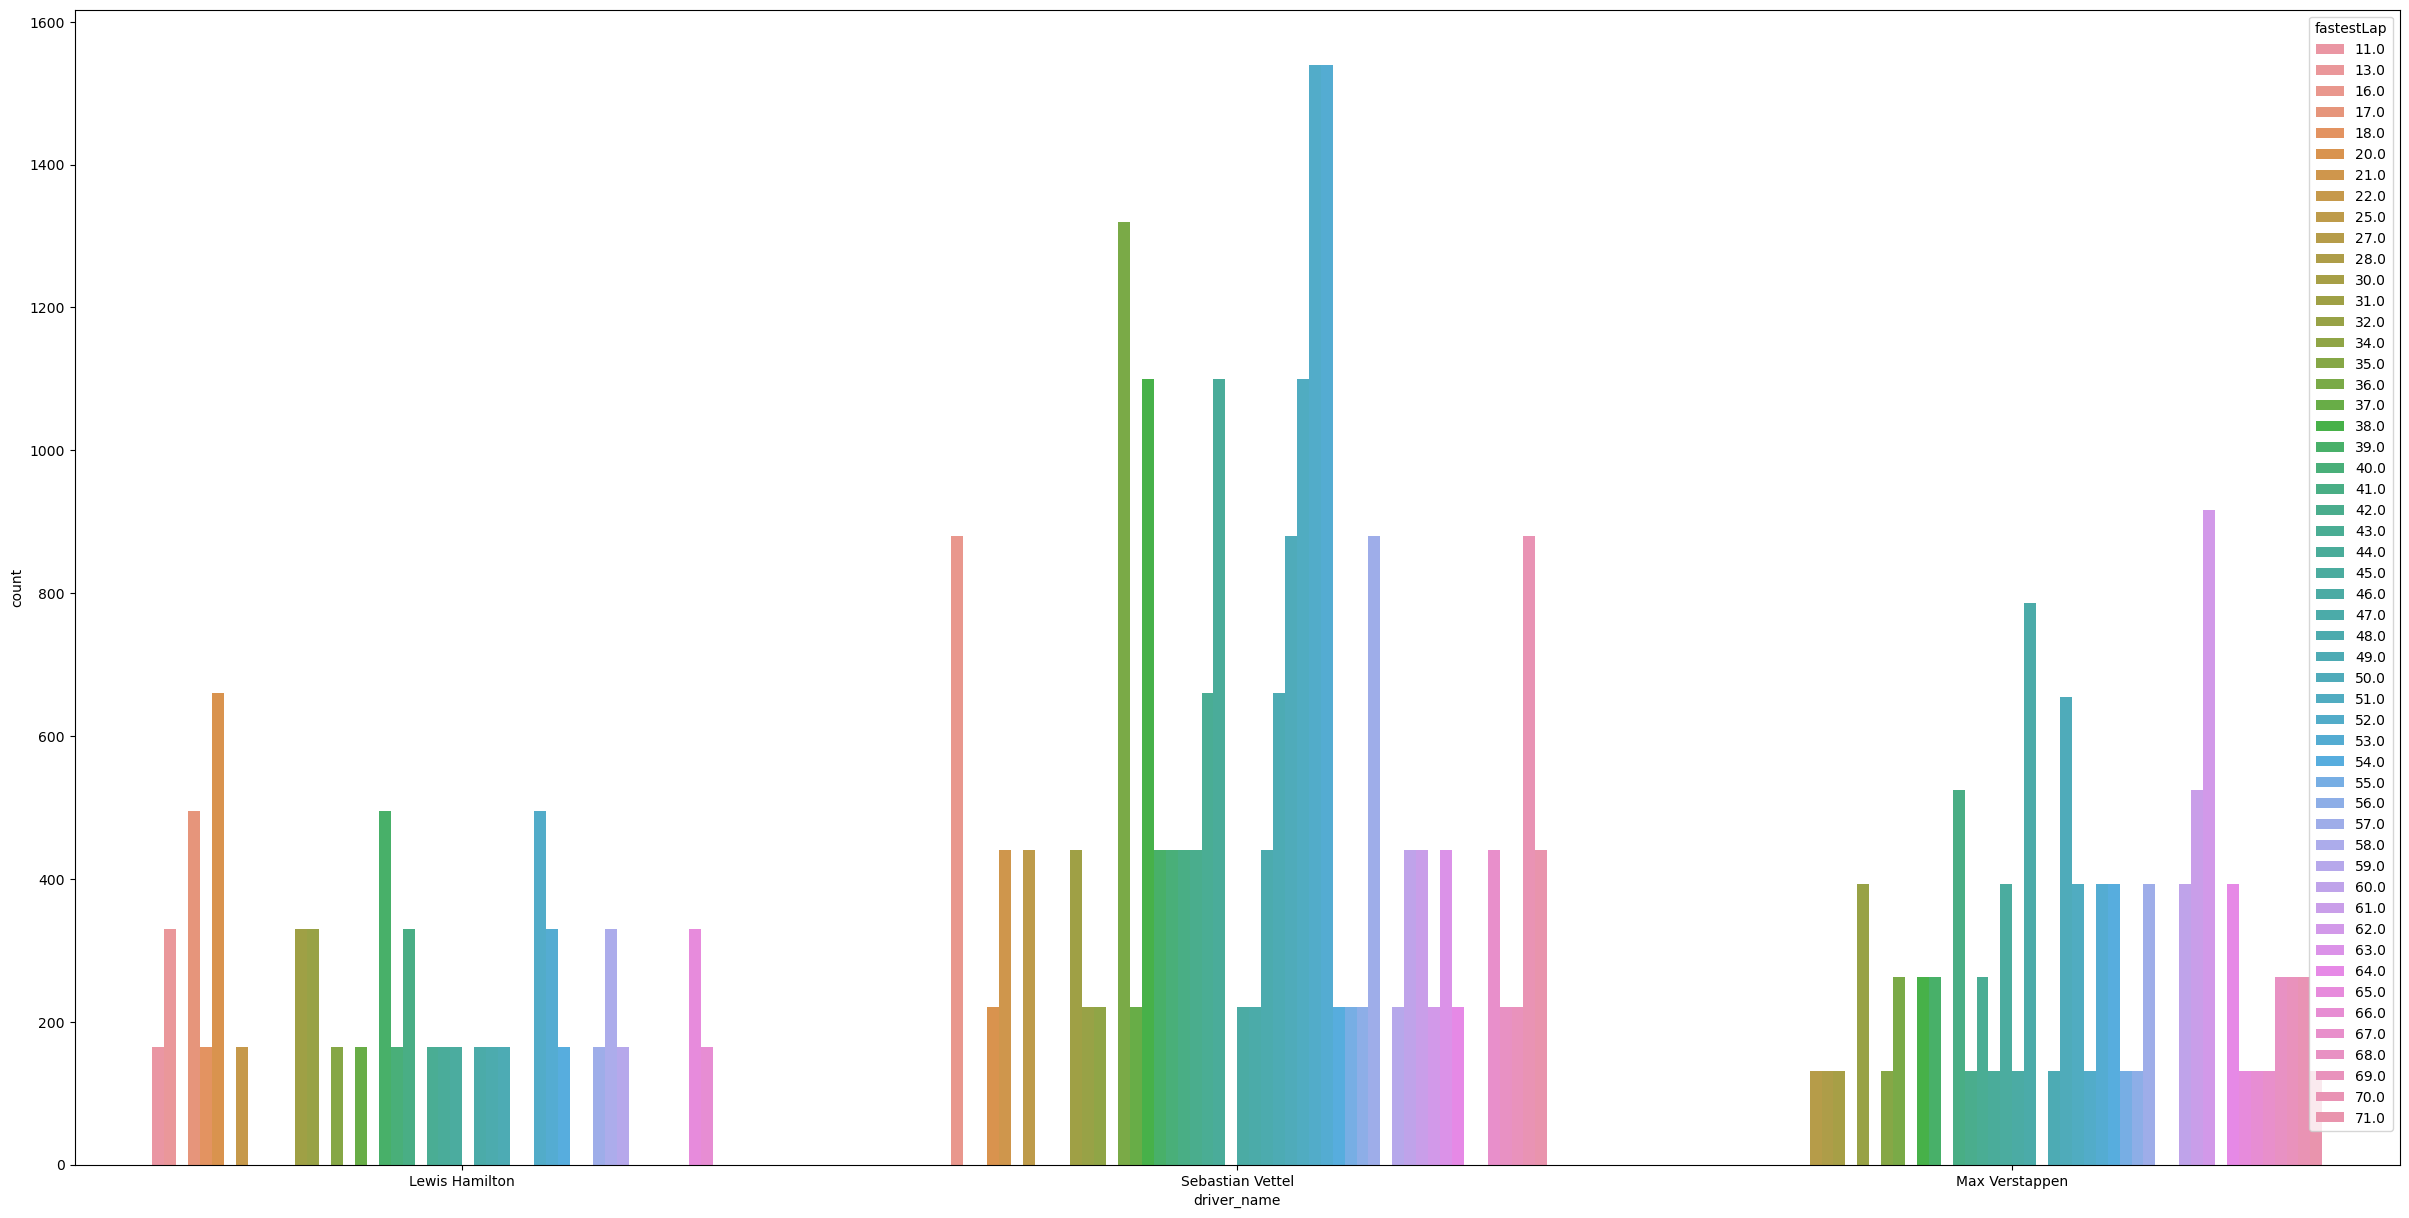

In [62]:
selected_drivers_df = df[df['driver_name'].isin([ 'Lewis Hamilton', 'Sebastian Vettel', 'Max Verstappen'])]

# Set the size of the figure
plt.figure(figsize=(30,15))

# Create the countplot using the filtered DataFrame
sns.countplot(x=selected_drivers_df['driver_name'], hue=selected_drivers_df['fastestLap'])

# Show the plot
plt.show()


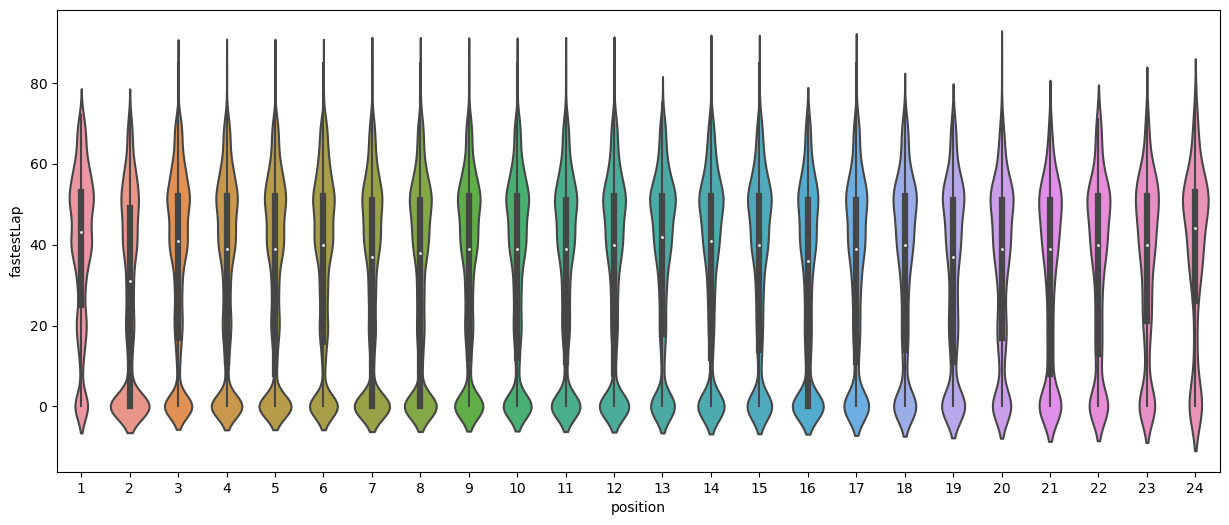

In [70]:
plt.figure(figsize=(15,6))

sns.violinplot(y = df['fastestLap'], x = df['position'])
plt.show()

# Correlation of columns from here 

In [42]:
df[num].corr()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,dob,driverStandingsId,position,wins,age
resultId,1.000000,0.958780,0.619669,-0.020896,0.243475,0.054479,0.123059,0.502187,-0.185899,-0.080955,0.561858,0.302801,0.273682,0.691096,0.441443,-0.009777,0.041082,-0.688924
racerId,0.958780,1.000000,0.658637,-0.030271,0.236681,0.045471,0.103754,0.482121,-0.156480,-0.050987,0.501119,0.254870,0.215468,0.693877,0.438543,-0.021540,0.043783,-0.691483
driverId,0.619669,0.658637,1.000000,0.057312,0.413688,0.160505,0.190766,0.183861,-0.096550,-0.038121,0.345064,0.270963,0.186867,0.760696,0.435631,0.050397,-0.003642,-0.754005
constructorId,-0.020896,-0.030271,0.057312,1.000000,0.307737,0.155511,0.120176,-0.104771,-0.073067,-0.017875,-0.103166,-0.048014,-0.028774,-0.062348,-0.053417,0.114614,-0.065570,0.066551
number,0.243475,0.236681,0.413688,0.307737,1.000000,0.242420,0.277601,-0.102647,-0.099654,-0.031830,0.138347,0.243114,0.090626,0.346037,0.160919,0.105600,-0.027853,-0.340296
grid,0.054479,0.045471,0.160505,0.155511,0.242420,1.000000,0.574861,-0.448178,-0.137152,-0.019857,0.055658,0.327563,0.029809,0.061059,0.025382,0.142666,-0.071399,-0.058256
positionOrder,0.123059,0.103754,0.190766,0.120176,0.277601,0.574861,1.000000,-0.688692,-0.137503,-0.038691,0.166177,0.564863,0.091871,0.088620,0.042521,0.160723,-0.093633,-0.085941
points,0.502187,0.482121,0.183861,-0.104771,-0.102647,-0.448178,-0.688692,1.000000,-0.024073,-0.054002,0.327608,-0.205355,0.168762,0.384981,0.248622,-0.138564,0.118247,-0.388001
laps,-0.185899,-0.156480,-0.096550,-0.073067,-0.099654,-0.137152,-0.137503,-0.024073,1.000000,0.446760,0.014969,-0.186183,-0.418747,-0.109229,-0.069106,-0.046142,0.020532,0.107646
timetaken_in_millisec,-0.080955,-0.050987,-0.038121,-0.017875,-0.031830,-0.019857,-0.038691,-0.054002,0.446760,1.000000,-0.092824,-0.153676,-0.674998,-0.086744,-0.054979,-0.013196,0.006302,0.086813


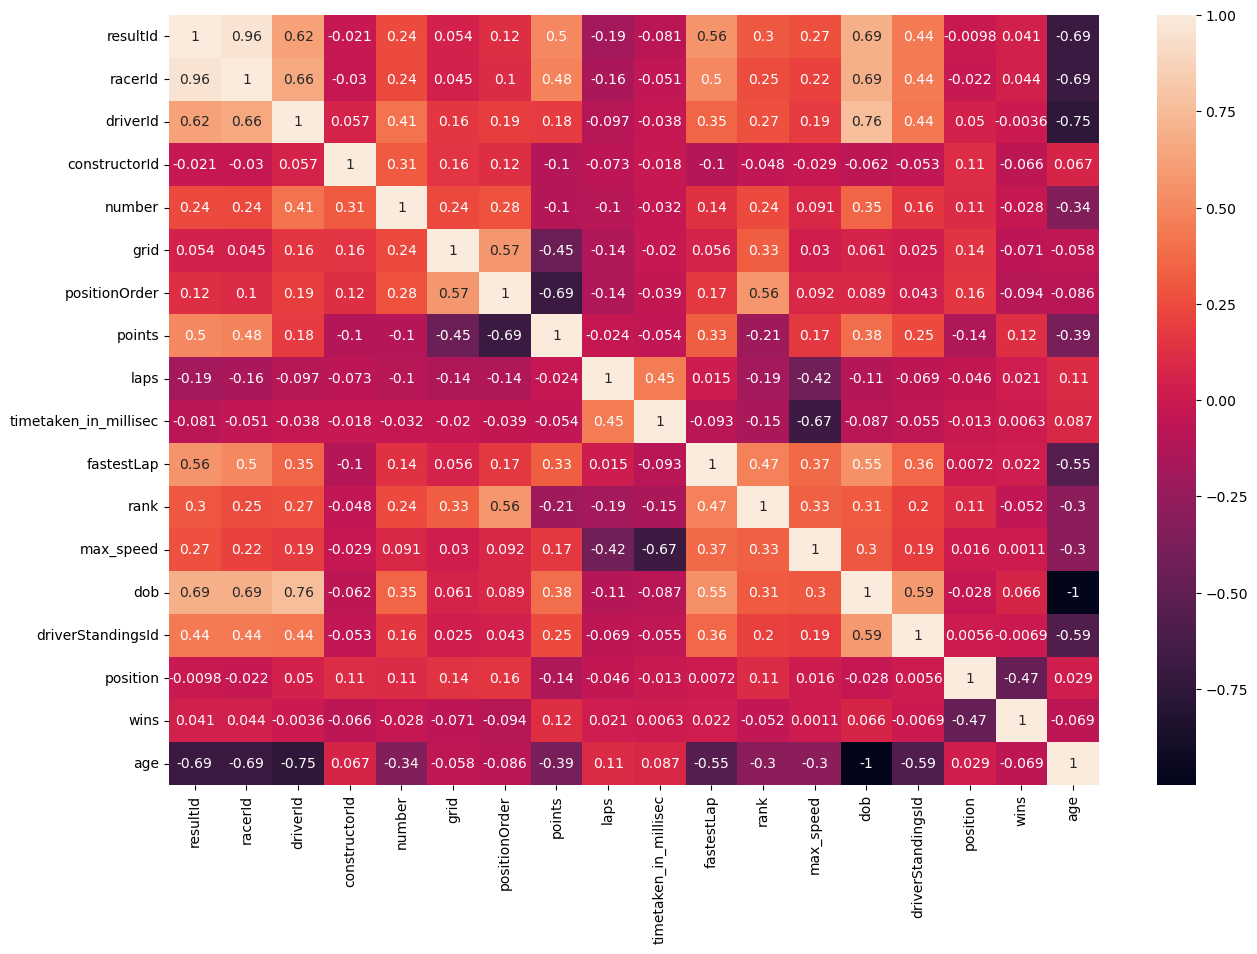

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
sns.heatmap(df[num].corr(),annot=True)
plt.show()

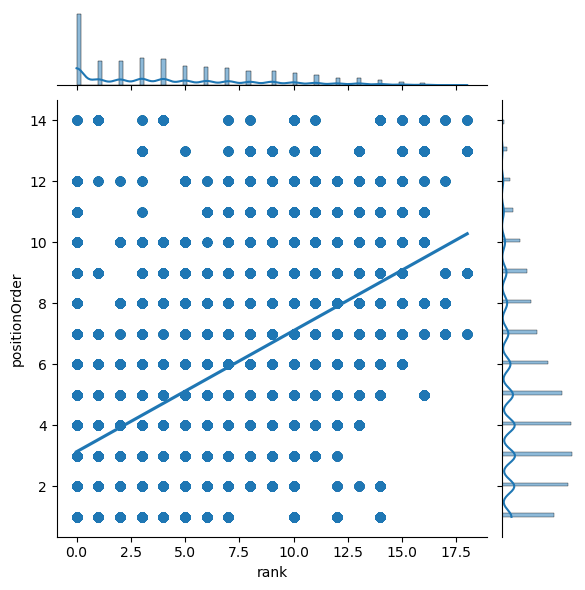

In [65]:
sns.jointplot(x = 'rank' , y = 'positionOrder', data = df, kind = 'reg')


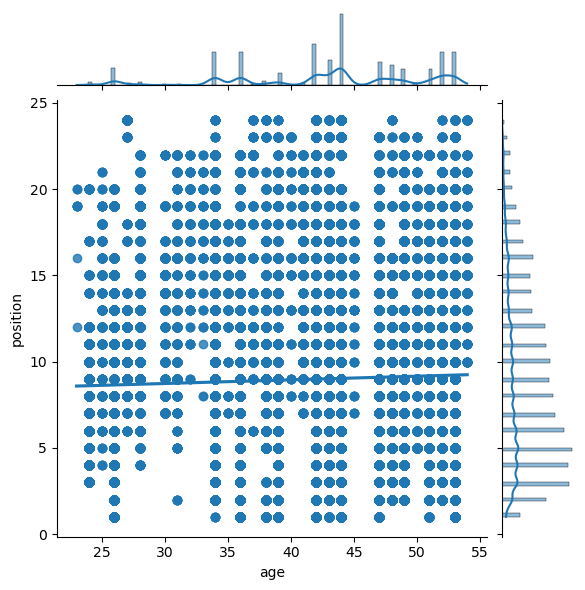

In [66]:
sns.jointplot(x = 'age' , y = 'position', data = df, kind = 'reg')


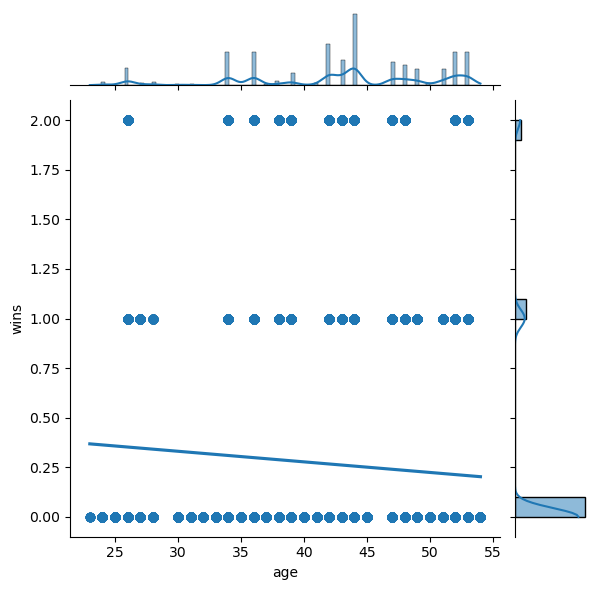

In [67]:
sns.jointplot(x = 'age' , y = 'wins', data = df, kind = 'reg')


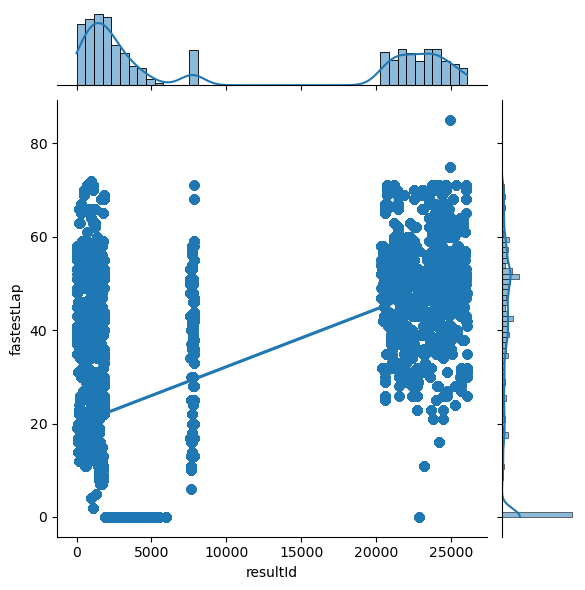

In [68]:
sns.jointplot(x = 'resultId' , y = 'fastestLap', data = df, kind = 'reg')


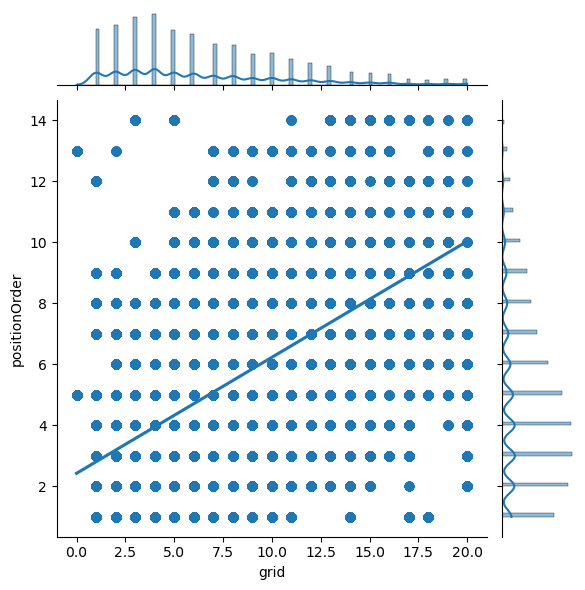

In [69]:
sns.jointplot(x = 'grid' , y = 'positionOrder', data = df, kind = 'reg')


# Checking the normalization 


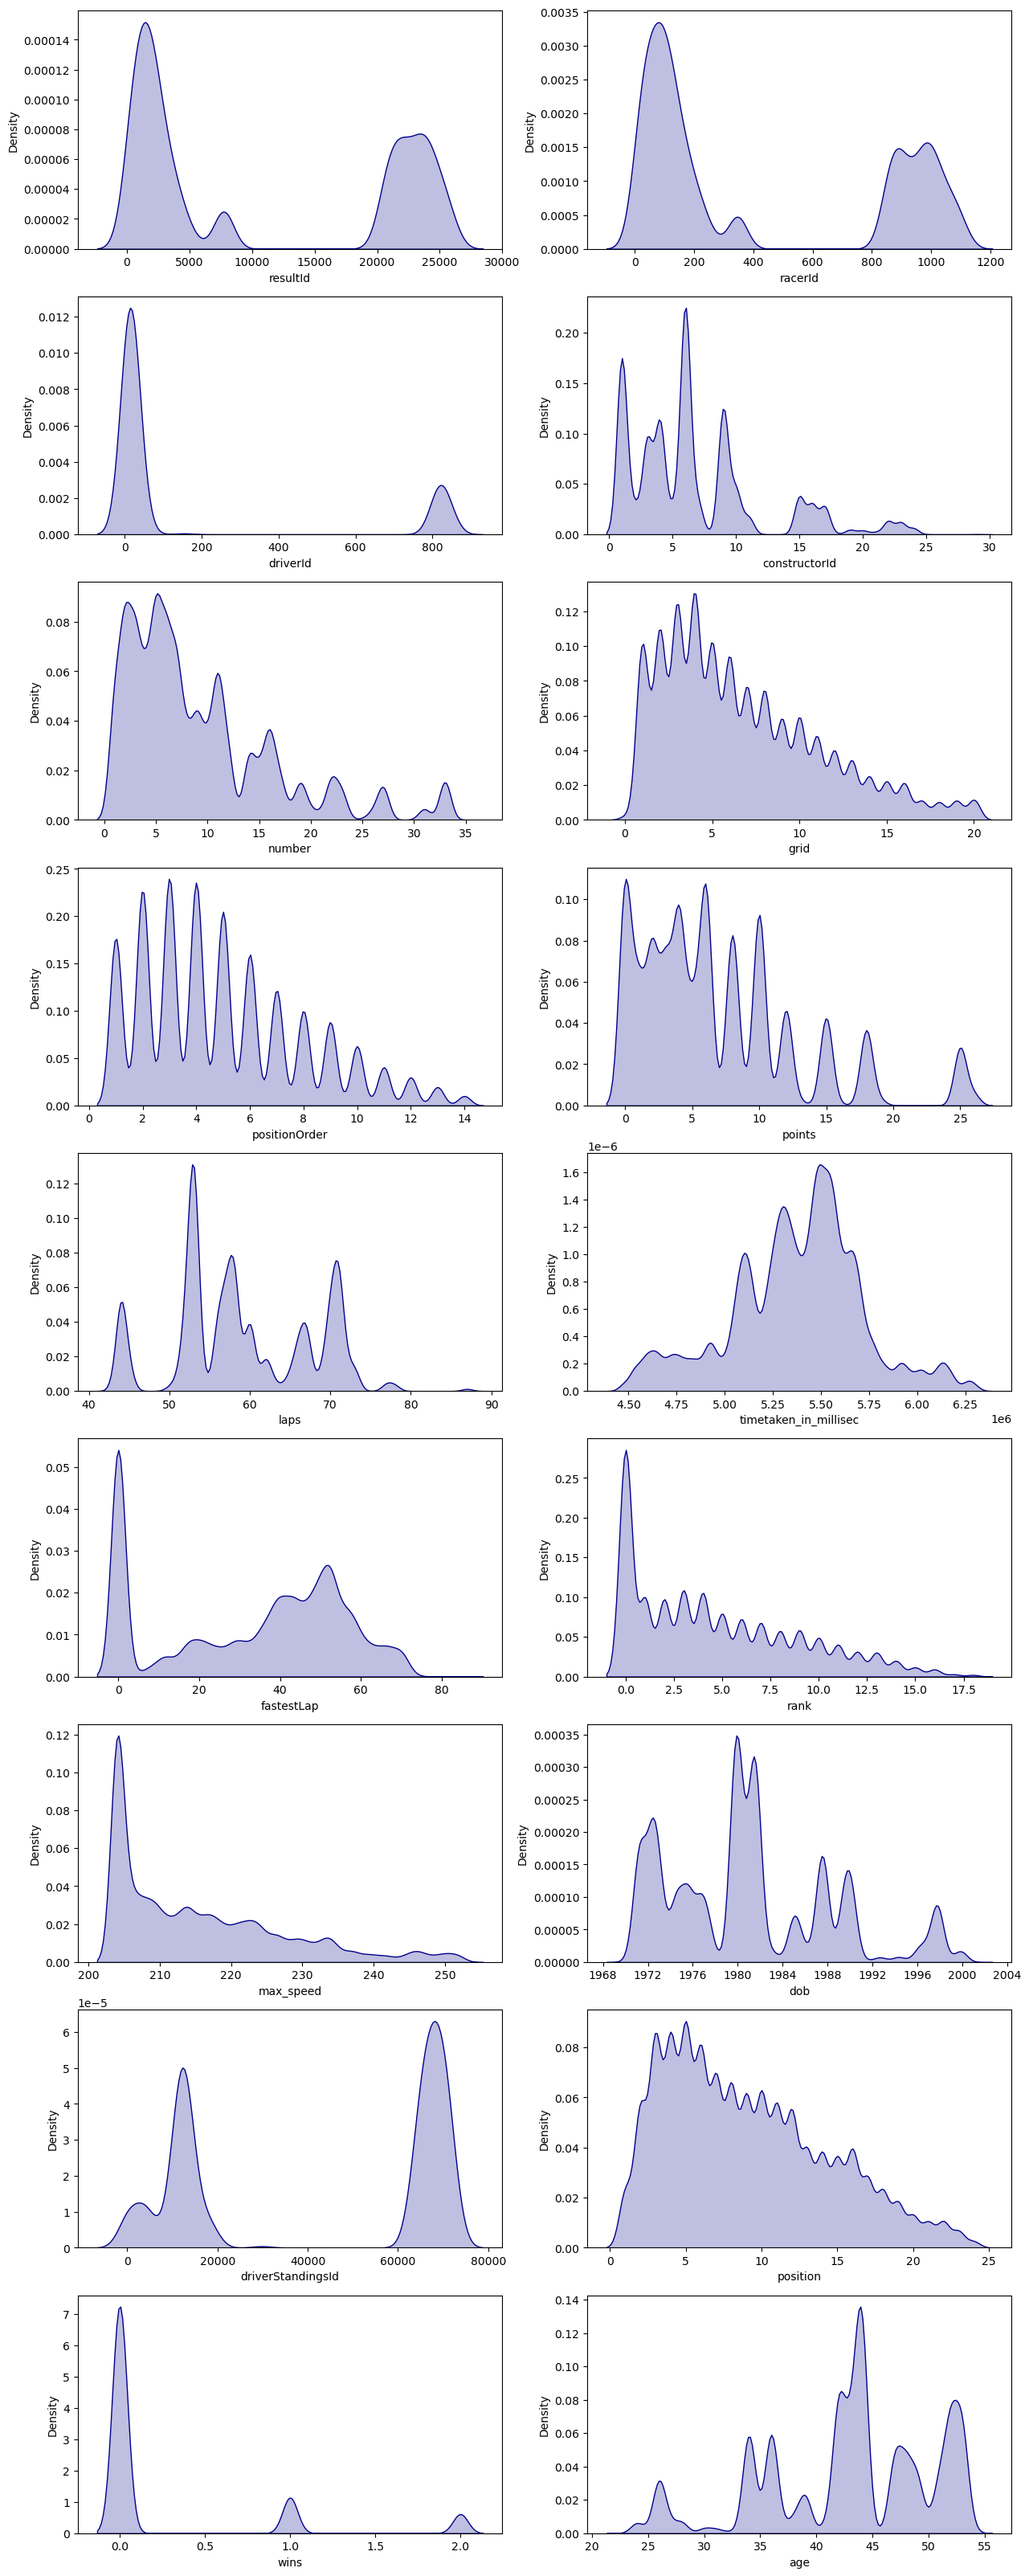

In [71]:
# kde plot for checking the normalization 

plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

# Normal Distribution Test of Timetaken(timetaken_in_millisec)

In [74]:
# Extract the timetaken_in_millisec column
timetaken_in_millisec = df["timetaken_in_millisec"]

# Fit a normal distribution to the data
fit = stats.norm.fit(timetaken_in_millisec)

# Get the parameters of the normal distribution
mu = fit[0]
sigma = fit[1]

# Print the mean and standard deviation of the normal distribution
print("Mean:", mu)
print("Standard deviation:", sigma)

# Check for normality using the Shapiro-Wilk test
shapiro_test = stats.shapiro(timetaken_in_millisec)

# Print the p-value of the Shapiro-Wilk test
print("Shapiro-Wilk p-value:", shapiro_test[1])

# If the p-value is greater than 0.05, then we fail to reject the null hypothesis that the data is normally distributed.
if shapiro_test[1] > 0.05:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

Mean: 5368264.4597197035
Standard deviation: 342308.32768681506
Shapiro-Wilk p-value: 0.0
The data is not normally distributed.


# Hypothesis testing(one sample t-test) 

In [72]:
import pandas as pd
from scipy import stats

# Extract the timetaken_in_millisec column
timetaken_in_millisec = df["max_speed"]

# Hypothesized mean
hypothesized_mean = 218.300000

# Calculate the t-statistic and p-value for a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(timetaken_in_millisec, popmean=hypothesized_mean)

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05  #0.05 or 0.01


if p_value < alpha:  #p-value is less than alpha -reject Ho
    print("Reject the null hypothesis . There is significant difference between the two samples" ) # significant difference between the two samples
else:
    print("Fail to reject the null hypothesis . no significant difference between the two samples") ## no significant difference between the two samples

T-statistic: -136.14740320395327
P-value: 0.0
Reject the null hypothesis . There is significant difference between the two samples


In [73]:
df['max_speed'].mean()

215.58207276232775